In [5]:
import matplotlib.pyplot as plt
import xarray as xr
import numpy as np
import pandas as pd
ds = xr.open_dataset("../../NC/compare.nc") 

In [6]:
def get_diff_valid(ds, name, time):
    # 构造变量名
    var_basin  = f"basin_{name}"
    var_region = f"region_{name}"

    # 取该年数据
    da_basin  = ds[var_basin].sel(time=time)
    da_region = ds[var_region].sel(time=time)

    # 差值
    diff = da_region - da_basin

    # 有效区域 mask（至少一个 > 0）
    mask = (da_basin > 0) | (da_region > 0)

    # 应用 mask → 无效格点变为 NaN
    diff_v = diff.where(mask)

    # squeeze 去掉时间维度，并取 numpy 值
    return diff_v.squeeze().values

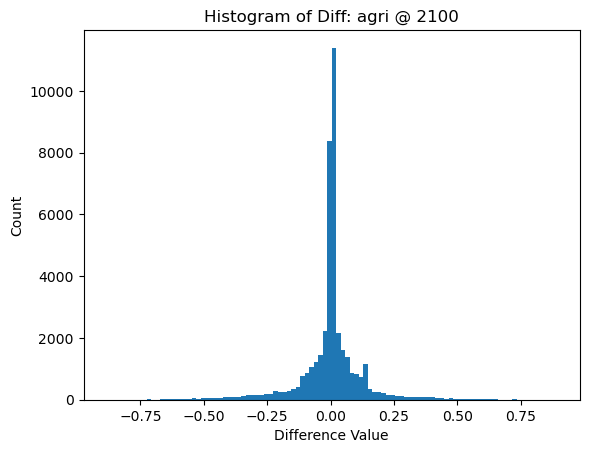

In [7]:
year = "2100"
name = "agri"
time =f"{year}-01-01"

diff_v = get_diff_valid(ds, name, time)

plt.hist(diff_v.flatten(), bins=100)
plt.title(f"Histogram of Diff: {name} @ {year}")
plt.xlabel("Difference Value")
plt.ylabel("Count")
plt.show()
